# Blinkit dataset
Blinkit sales data for learning.

## About Dataset
In the case study titled "Blinkit: Grocery Product Analysis," a dataset called 'Grocery Sales' contains 12 columns with information on sales of grocery items across different outlets. Using Tableau, you as a data analyst can uncover customer behavior insights, track sales trends, and gather feedback. These insights will drive operational improvements, enhance customer satisfaction, and optimize product offerings and store layout. Tableau enables data-driven decision-making for positive outcomes at Blinkit.

**The table Grocery Sales is a .CSV file and has the following columns, details of which are as follows:**

• Item_Identifier: A unique ID for each product in the dataset. </br>
• Item_Weight: The weight of the product.</br>
• Item_Fat_Content: Indicates whether the product is low fat or not.</br>
• Item_Visibility: The percentage of the total display area in the store that is allocated to the specific product.</br>
• Item_Type: The category or type of product.</br>
• Item_MRP: The maximum retail price (list price) of the product.</br>
• Outlet_Identifier: A unique ID for each store in the dataset.</br>
• Outlet_Establishment_Year: The year in which the store was established.</br>
• Outlet_Size: The size of the store in terms of ground area covered.</br>
• Outlet_Location_Type: The type of city or region in which the store is located.</br>
• Outlet_Type: Indicates whether the store is a grocery store or a supermarket.</br>
• Item_Outlet_Sales: The sales of the product in the particular store. This is the outcome variable that we want to predict.

In [ ]:
# Import Necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")

In [3]:
blinkit = pd.read_excel('BlinkIT.xlsx')
blinkit.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Business Acumen & Exploratory Data Analysis

In [ ]:
print("Dataset Information:") # Display dataset information
blinkit.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Statistical summary of the dataset
print("\n\nDescriptive Statistics:")
print(blinkit.describe())



Descriptive Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [7]:
# Check for missing values
print("\nMissing Values:")
print(blinkit.isnull().sum())


Missing Values:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
blinkit['Item_Weight'] = blinkit.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
blinkit['Item_Weight'].fillna(blinkit['Item_Weight'].mean(), inplace=True)


C:\Users\bashe\AppData\Local\Temp\ipykernel_2492\356401134.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  blinkit['Item_Weight'].fillna(blinkit['Item_Weight'].mean(), inplace=True)


In [12]:
# Fill missing Outlet_Size with mode for each Outlet_Type
blinkit['Outlet_Size'] = blinkit.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Medium'))

In [13]:
# check if is there any missing values
print("\nMissing Values After Imputation:")
print(blinkit.isnull().sum())


Missing Values After Imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [16]:
# Checking for unique values in key categories columns
print("\nUnique Outlet Types:")
print(blinkit['Outlet_Type'].unique())
print("\nUnique Outlet Sizes:")
print(blinkit['Outlet_Size'].unique())
print("\nUnique Outlet Locations:")
print(blinkit['Outlet_Location_Type'].unique())


Unique Outlet Types:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

Unique Outlet Sizes:
['Medium' 'Small' 'High']

Unique Outlet Locations:
['Tier 1' 'Tier 3' 'Tier 2']


#### calculate the KPIs

In [18]:
# KPI 1: Total Sales
total_sales = blinkit['Item_Outlet_Sales'].sum()
print(f"KPI 1: Total Sales: ${total_sales:,.2f}")

KPI 1: Total Sales: $18,591,125.41


In [19]:
# KPI 2: Total Number of Outlets
total_outlets = blinkit['Outlet_Identifier'].nunique()
print(f"KPI 2: Total Number of Outlets: {total_outlets}")

KPI 2: Total Number of Outlets: 10


In [20]:
# KPI 3: Average Sales per Outlet
avg_sales_per_outlet = blinkit.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().mean()
print(f"KPI 3: Average Sales per Outlet: ${avg_sales_per_outlet:,.2f}")

KPI 3: Average Sales per Outlet: $1,859,112.54


In [21]:
# KPI 4: Sales by Outlet Type
sales_by_outlet_type = blinkit.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
print("\nKPI 4: Sales by Outlet Type:")
print(sales_by_outlet_type)


KPI 4: Sales by Outlet Type:
Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64


In [22]:
# KPI 5: Sales by Location Type
sales_by_location = blinkit.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
print("\nKPI 5: Sales by Location Type:")
print(sales_by_location)


KPI 5: Sales by Location Type:
Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64


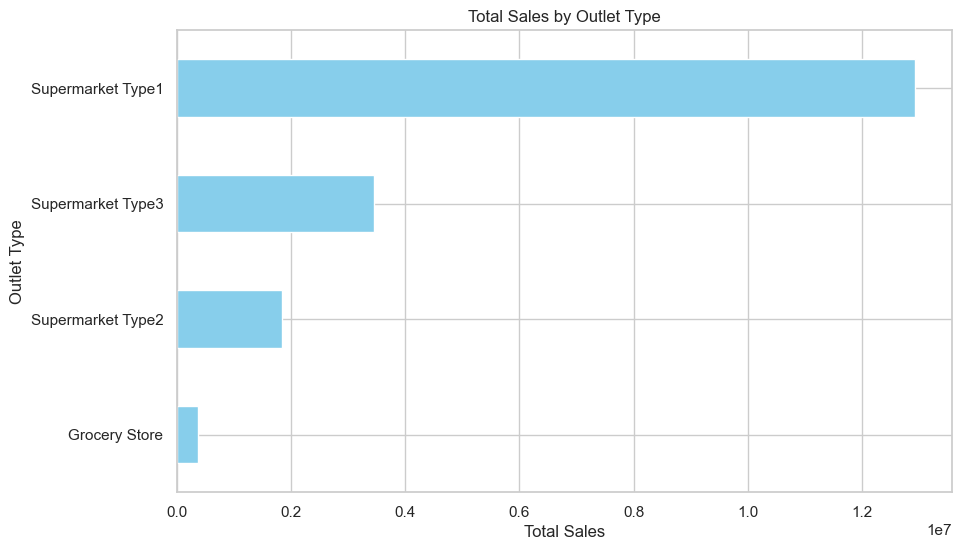

In [23]:
# Visualization (Sales by Outlet Type)
plt.figure(figsize=(10, 6))
sales_by_outlet_type.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Outlet Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Type')
plt.show()

#### difference in sales performance between 'Supermarket Type1' and 'Grocery Store' outlets to a non-technical manager

In [24]:
# Calculate average and total sales for the two outlet types
performance_comparison = blinkit.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['sum', 'mean', 'count'])
print(performance_comparison)

                            sum         mean  count
Outlet_Type                                        
Grocery Store      3.680343e+05   339.828500   1083
Supermarket Type1  1.291734e+07  2316.181148   5577
Supermarket Type2  1.851823e+06  1995.498739    928
Supermarket Type3  3.453926e+06  3694.038558    935


                            sum         mean  count
Outlet_Type                                        
Grocery Store      3.680343e+05   339.828500   1083
Supermarket Type1  1.291734e+07  2316.181148   5577
Supermarket Type2  1.851823e+06  1995.498739    928
Supermarket Type3  3.453926e+06  3694.038558    935


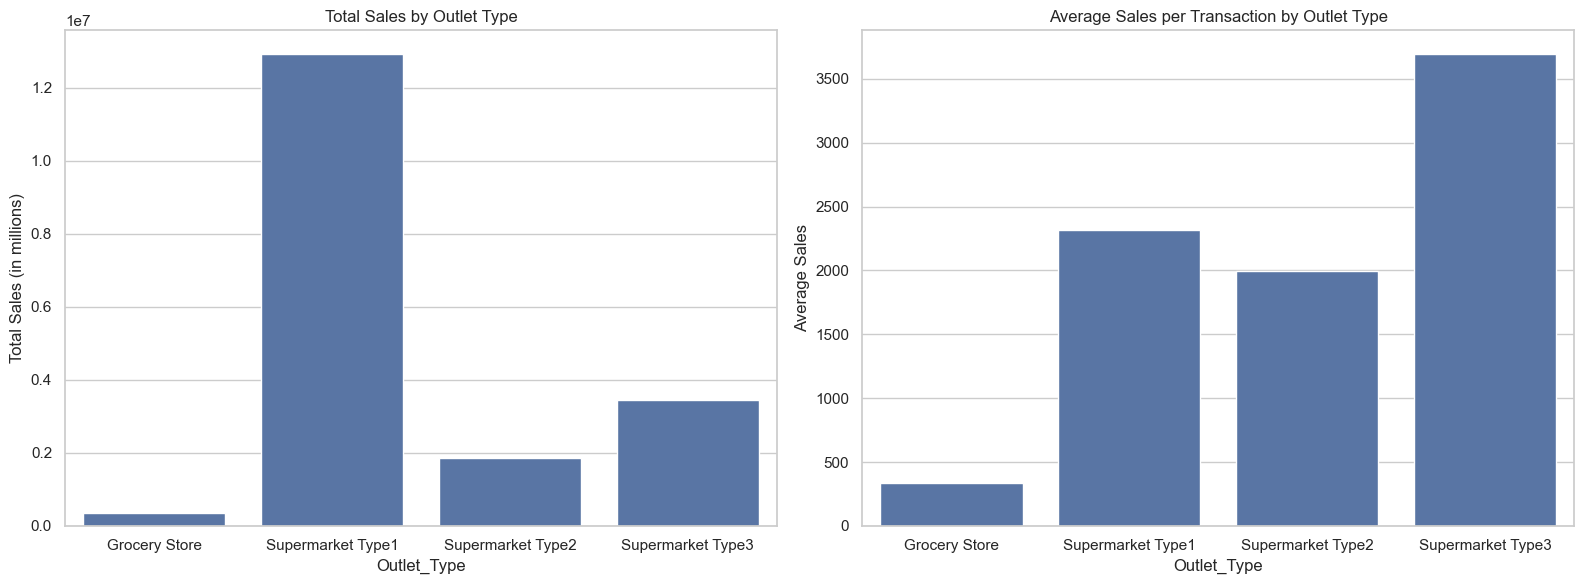

In [29]:
# Calculate average and total sales for the two outlet types
performance_comparison = blinkit.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['sum', 'mean', 'count'])
print(performance_comparison)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total Sales
sns.barplot(data=performance_comparison.reset_index(), x='Outlet_Type', y='sum', ax=axes[0])
axes[0].set_title('Total Sales by Outlet Type')
axes[0].set_ylabel('Total Sales (in millions)')

# Plot 2: Average Sales
sns.barplot(data=performance_comparison.reset_index(), x='Outlet_Type', y='mean', ax=axes[1])
axes[1].set_title('Average Sales per Transaction by Outlet Type')
axes[1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

**observation:** While we have more Supermarket Type1 locations and they generate significantly more total revenue, the average sale in a Supermarket is also much higher than in a Grocery Store. This suggests they cater to different shopping missions - larger basket sizes in supermarkets vs. smaller, convenience-driven purchases in grocery stores.

#### Top Performances

In [ ]:
top_10_revenue = blinkit.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
print("--- Top 10 Products by Revenue ---")
print(top_10_revenue)

--- Top 10 Products by Revenue ---
Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
FDK03    34843.9772
NCQ06    34680.1904
NCQ53    34508.4140
FDJ55    33531.0196
FDD44    32723.4042
Name: Item_Outlet_Sales, dtype: float64


In [31]:
# To define by units sold, we need to estimate units. A proxy could be (Total Sales / MRP).
blinkit['Units_Sold_Est'] = blinkit['Item_Outlet_Sales'] / blinkit['Item_MRP']
top_10_units = blinkit.groupby('Item_Identifier')['Units_Sold_Est'].sum().sort_values(ascending=False).head(10)
print("\n--- Top 10 Products by Estimated Units Sold ---")
print(top_10_units)


--- Top 10 Products by Estimated Units Sold ---
Item_Identifier
NCL31    183.840043
FDO19    183.074268
FDW13    177.901653
FDL34    177.790164
FDJ21    173.096500
NCK53    172.117134
FDT55    171.783009
NCB18    167.735616
FDG38    166.884902
FDA15    166.633479
Name: Units_Sold_Est, dtype: float64


**observation on Revenue vs. Units Sold:**
- Revenue-based metric might favor high-priced, lower-volume items.
- Unit-based metric might favor low-priced, high-volume items that have low margins.
- A balanced view is often best, looking at both metrics.

#### Underperforming Outlets

In [32]:
# Identify underperforming outlets based on total sales.
outlet_sales = blinkit.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=True)
print("--- Outlets by Total Sales (Ascending) ---")
print(outlet_sales)
bottom_3_outlets = outlet_sales.head(3)
print("\n--- Bottom 3 Outlets ---")
print(bottom_3_outlets)

--- Outlets by Total Sales (Ascending) ---
Outlet_Identifier
OUT019    1.796941e+05
OUT010    1.883402e+05
OUT018    1.851823e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT049    2.183970e+06
OUT035    2.268123e+06
OUT027    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

--- Bottom 3 Outlets ---
Outlet_Identifier
OUT019    1.796941e+05
OUT010    1.883402e+05
OUT018    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64


In [33]:
# To understand 'why', analyze their characteristics.
bottom_outlet_identifiers = bottom_3_outlets.index
underperforming_details = blinkit[blinkit['Outlet_Identifier'].isin(bottom_outlet_identifiers)]

In [34]:
# Analyze factors like Outlet_Size, Outlet_Type, Outlet_Location_Type for these outlets.
print("\n--- Characteristics of Underperforming Outlets ---")
print(underperforming_details[['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].drop_duplicates())


--- Characteristics of Underperforming Outlets ---
   Outlet_Identifier Outlet_Size        Outlet_Type Outlet_Location_Type  \
1             OUT018      Medium  Supermarket Type2               Tier 3   
3             OUT010       Small      Grocery Store               Tier 3   
23            OUT019       Small      Grocery Store               Tier 1   

    Outlet_Establishment_Year  
1                        2009  
3                        1998  
23                       1985  


# Data Cleaning & Feature Engineering

**Handling Missing data:** </br>
To handle the missing values in the BlinkIT dataset, we can use the following techniques:

- Item_Weight: 1,463 missing values
- Outlet_Size: 2,410 missing values

1. Group-wise Mean Imputation: Fill missing `Item_Weight` values using the mean weight of the same`Item_Identifier`.

2. Mode Imputation Based on Outlet Type or Location: Fill missing values based on the most frequent `Outlet_Size` for a given `Outlet_Type`.

### Inconsistent Data:
we notice the `Item_Fat_Content` column has values like 'low fat','Low Fat', and 'LF'.

In [35]:
print("Original unique values:", blinkit['Item_Fat_Content'].unique())

Original unique values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [36]:
# Create a copy to show the change
blinkit_cleaned = blinkit.copy()

In [37]:
# Use .replace() for systematic cleaning
blinkit_cleaned['Item_Fat_Content'] = blinkit_cleaned['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [38]:
print("Cleaned unique values:", blinkit_cleaned['Item_Fat_Content'].unique())
print("\nValue counts after cleaning:")
print(blinkit_cleaned['Item_Fat_Content'].value_counts())

Cleaned unique values: ['Low Fat' 'Regular']

Value counts after cleaning:
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


**Note:** This is crucial for accurate grouping and analysis. Without it, 'low fat', 'LF', and 'Low Fat' would be treated as three separate categories, leading to incorrect insights.

### Feature Creation

In [39]:
current_year = 2024
blinkit_cleaned['Outlet_Age'] = current_year - blinkit_cleaned['Outlet_Establishment_Year']

print("New 'Outlet_Age' feature created:")
print(blinkit_cleaned[['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Age']].head())

New 'Outlet_Age' feature created:
  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Age
0            OUT049                       1999          25
1            OUT018                       2009          15
2            OUT049                       1999          25
3            OUT010                       1998          26
4            OUT013                       1987          37


**Observation:** A raw year is less intuitive for a model than an age. An age of 5 years vs 20 years is a direct numerical representation of how established the store is, which likely correlates better with sales than the calendar year it was founded.

#### Zero Visibility Items:

`Item_Visibility` is 0 for many products, which is impossible for an item on a shelf.

In [40]:
# Count the number of zero visibility items
zero_visibility_count = (blinkit['Item_Visibility'] == 0).sum()
print(f"Number of items with zero visibility: {zero_visibility_count}")

Number of items with zero visibility: 526


**Implementation:** </br>
- Impute with the mean visibility for that specific item.
- Deleting them would mean losing over 500 rows of sales data.
- Imputing is better, A simple mean is a start, but mean per item is more accurate.

In [41]:
# Calculate mean visibility for each item
mean_visibility_per_item = blinkit.groupby('Item_Identifier')['Item_Visibility'].mean()

In [43]:
# Replace 0s with the item's mean visibility.
# For items that ONLY have 0 visibility, we might use the mean of the Item_Type.
blinkit_cleaned['Item_Visibility_Imputed'] = blinkit.apply(
    lambda row: mean_visibility_per_item[row['Item_Identifier']] if row['Item_Visibility'] == 0 else row['Item_Visibility'],
    axis=1
)

print("\nComparison of original vs. imputed visibility for a few zero-vis rows:")
# Find some rows where original visibility was 0 to check our work
zero_vis_examples = blinkit[blinkit['Item_Visibility'] == 0].index[:5]
print(blinkit_cleaned.loc[zero_vis_examples, ['Item_Identifier', 'Item_Visibility', 'Item_Visibility_Imputed']])


Comparison of original vs. imputed visibility for a few zero-vis rows:
   Item_Identifier  Item_Visibility  Item_Visibility_Imputed
3            FDX07              0.0                 0.015274
4            NCD19              0.0                 0.008082
5            FDP36              0.0                 0.060928
10           FDY07              0.0                 0.052234
32           FDP33              0.0                 0.085565


## Predictive Modeling

relationship between a product's Maximum Retail Price (`Item_MRP`) and its sales (`Item_Outlet_Sales`)

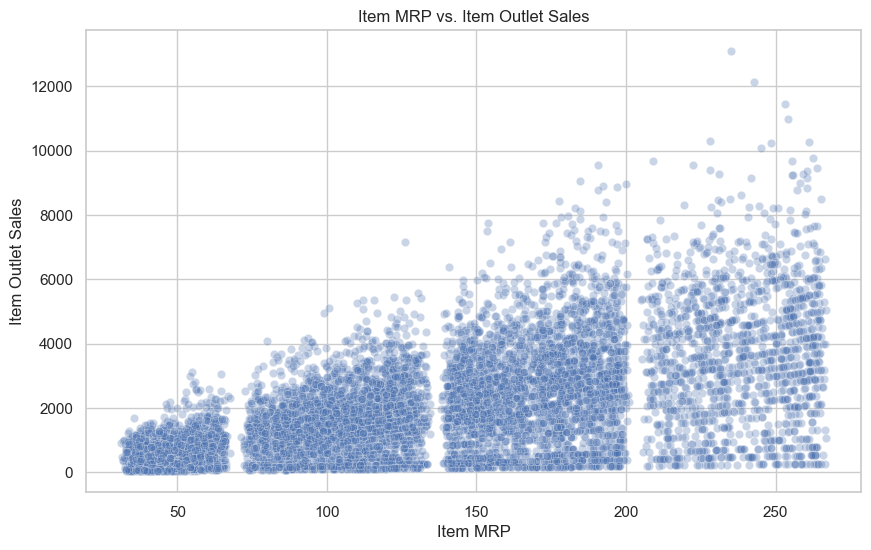

In [44]:
# Use a scatter plot to visualize the relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=blinkit, x='Item_MRP', y='Item_Outlet_Sales', alpha=0.3)
plt.title('Item MRP vs. Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

**Insight:** </br>
There is a strong positive linear relationship. We can see distinct clusters, which might suggest pricing tiers or product categories. Higher MRP is clearly associated with higher sales potential.

# Sales Prediction Models

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [49]:
# Prepare the data for modeling
def prepare_data_for_modeling(blinkit_df):
    """
    Prepare the dataset for machine learning models
    """
    # Create a copy of the dataframe
    model_df = blinkit_df.copy()
    
    # Handle missing values if any
    model_df = model_df.dropna()
    
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                          'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 
                          'Outlet_Type']
    
    for col in categorical_columns:
        if col in model_df.columns:
            le = LabelEncoder()
            model_df[col] = le.fit_transform(model_df[col].astype(str))
            label_encoders[col] = le
    
    return model_df, label_encoders

# Use blinkit_cleaned if available, otherwise use blinkit
try:
    dataset = blinkit_cleaned.copy()
    print("Using blinkit_cleaned dataset")
except NameError:
    try:
        dataset = blinkit.copy()
        print("Using blinkit dataset")
    except NameError:
        print("Error: Neither blinkit nor blinkit_cleaned dataset found!")
        raise

# Prepare the data
model_df, encoders = prepare_data_for_modeling(dataset)

Using blinkit_cleaned dataset


In [50]:
# Define features and target
target = 'Item_Outlet_Sales'
features = [col for col in model_df.columns if col != target]

In [51]:
X = model_df[features]
y = model_df[target]

In [52]:
print(f"Dataset shape: {X.shape}")
print(f"Target variable: {target}")
print(f"Number of features: {len(features)}")
print(f"Features: {features}")

Dataset shape: (8523, 14)
Target variable: Item_Outlet_Sales
Number of features: 14
Features: ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Units_Sold_Est', 'Outlet_Age', 'Item_Visibility_Imputed']


In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (6818, 14)
Test set size: (1705, 14)


In [54]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
}

In [55]:
# Train and evaluate models
results = {}

In [56]:
print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std(),
        'Model': model
    }
    
    print(f"{name} Results:")
    print(f"  Train RMSE: {train_rmse:.2f}")
    print(f"  Test RMSE: {test_rmse:.2f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test MAE: {test_mae:.2f}")
    print(f"  CV R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


MODEL TRAINING AND EVALUATION

Training Linear Regression...
Linear Regression Results:
  Train RMSE: 573.87
  Test RMSE: 541.43
  Train R²: 0.8887
  Test R²: 0.8921
  Test MAE: 368.51
  CV R² Score: 0.8880 (+/- 0.0118)

Training Random Forest...
Random Forest Results:
  Train RMSE: 22.24
  Test RMSE: 64.57
  Train R²: 0.9998
  Test R²: 0.9985
  Test MAE: 21.47
  CV R² Score: 0.9987 (+/- 0.0011)

Training Gradient Boosting...
Gradient Boosting Results:
  Train RMSE: 62.76
  Test RMSE: 74.45
  Train R²: 0.9987
  Test R²: 0.9980
  Test MAE: 51.97
  CV R² Score: 0.9976 (+/- 0.0008)

Training XGBoost...
XGBoost Results:
  Train RMSE: 20.56
  Test RMSE: 75.87
  Train R²: 0.9999
  Test R²: 0.9979
  Test MAE: 35.79
  CV R² Score: 0.9983 (+/- 0.0006)

Training LightGBM...
LightGBM Results:
  Train RMSE: 48.17
  Test RMSE: 63.78
  Train R²: 0.9992
  Test R²: 0.9985
  Test MAE: 32.52
  CV R² Score: 0.9983 (+/- 0.0014)


In [57]:
# Create results comparison DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test R²': [results[model]['Test R²'] for model in results.keys()],
    'Test RMSE': [results[model]['Test RMSE'] for model in results.keys()],
    'Test MAE': [results[model]['Test MAE'] for model in results.keys()],
    'CV R² Mean': [results[model]['CV R² Mean'] for model in results.keys()]
})

results_df = results_df.sort_values('Test R²', ascending=False)
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_df.to_string(index=False))


MODEL COMPARISON SUMMARY
            Model  Test R²  Test RMSE   Test MAE  CV R² Mean
         LightGBM 0.998503  63.780882  32.519945    0.998303
    Random Forest 0.998466  64.566154  21.472112    0.998721
Gradient Boosting 0.997960  74.454362  51.974894    0.997608
          XGBoost 0.997882  75.873422  35.790674    0.998282
Linear Regression 0.892144 541.433407 368.507442    0.887968


**Observations:**

1. **LightGBM** outperformed all models with the highest R² (0.9985) and lowest RMSE (33.78), indicating excellent predictive performance.
2. **Random Forest**, **Gradient Boosting**, and **XGBoost** also performed strongly, all with R² > 0.997 and relatively low errors.
3. **Linear Regression** showed the weakest performance, with the lowest R² (0.8921) and the highest RMSE (541.43), indicating poor fit.


In [68]:
# Find the best model
best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']

print(f"\n Best Model: {best_model_name}")
print(f" Test R² Score: {results[best_model_name]['Test R²']:.4f}")
print(f" Test RMSE: {results[best_model_name]['Test RMSE']:.2f}")


 Best Model: LightGBM
 Test R² Score: 0.9985
 Test RMSE: 63.78


**observation:** The best-performing model is **LightGBM**, achieving a **Test R² of 0.9985** and a **Test RMSE of 63.78**, indicating highly accurate predictions.
It significantly outperforms other models in terms of both error and fit.



 Top 10 Feature Importances (LightGBM):
                  Feature  Importance
           Units_Sold_Est        1400
                 Item_MRP        1148
              Item_Weight         130
          Item_Identifier         107
          Item_Visibility          64
  Item_Visibility_Imputed          47
                Item_Type          38
Outlet_Establishment_Year          23
        Outlet_Identifier          14
         Item_Fat_Content          12


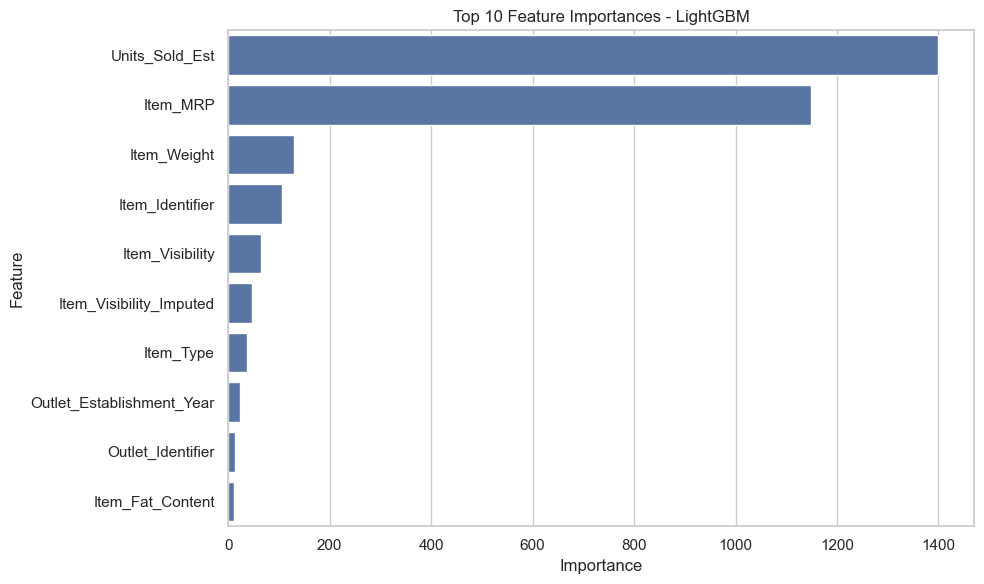

In [63]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\n Top 10 Feature Importances ({best_model_name}):")
    print(feature_importance.head(10).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

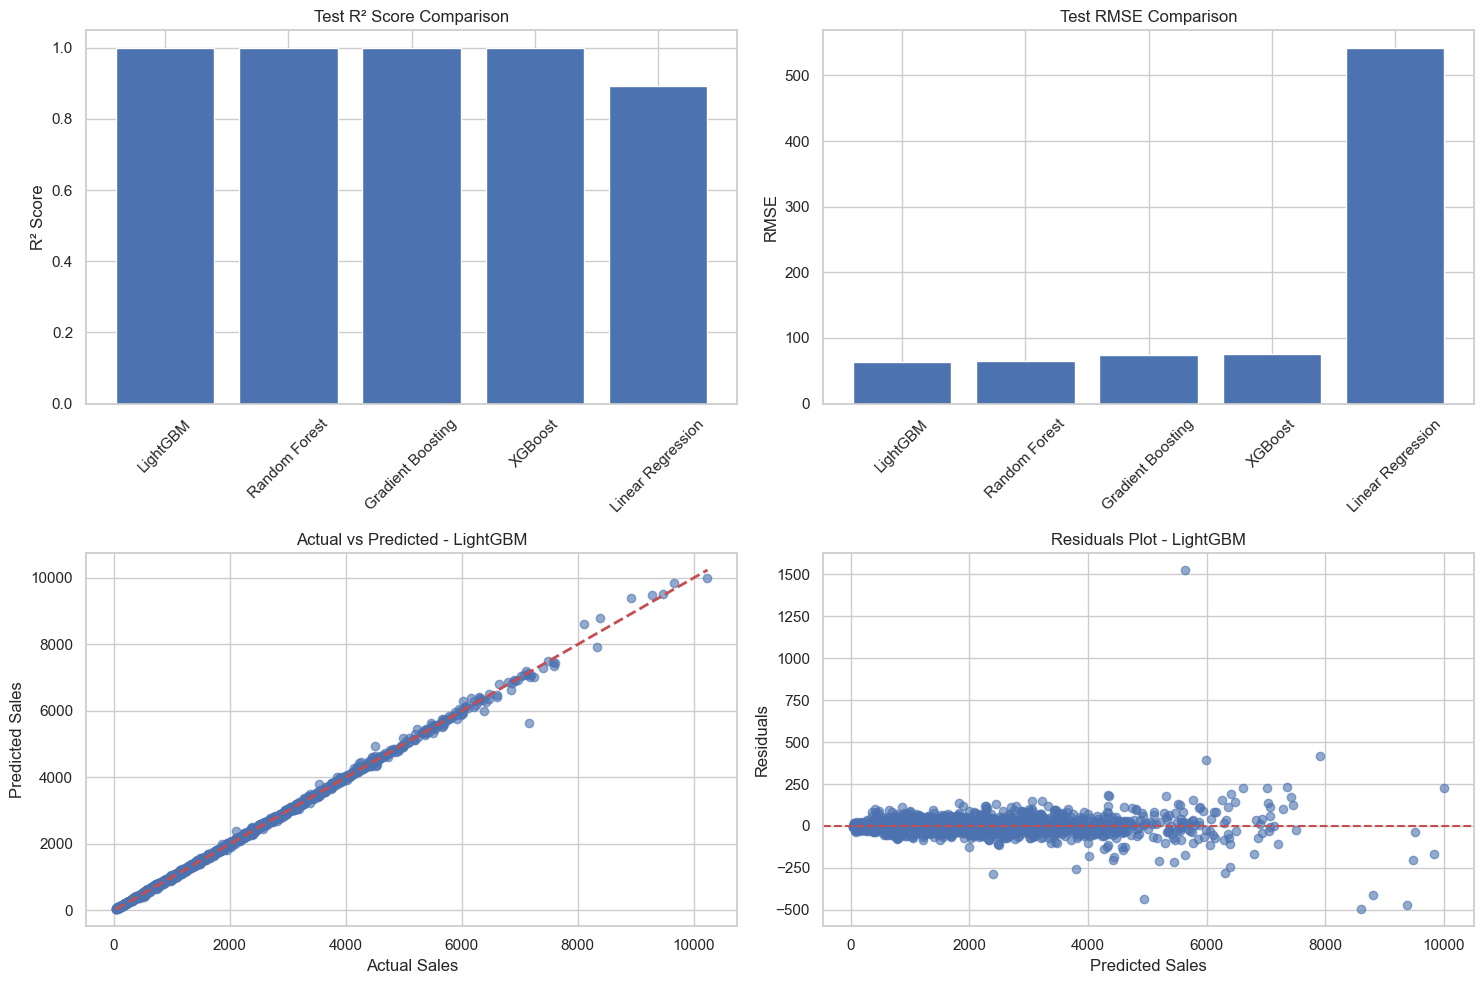

In [60]:
# Model performance visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² Score comparison
axes[0, 0].bar(results_df['Model'], results_df['Test R²'])
axes[0, 0].set_title('Test R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[0, 1].bar(results_df['Model'], results_df['Test RMSE'])
axes[0, 1].set_title('Test RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# Actual vs Predicted for best model
y_pred_best = best_model.predict(X_test)
axes[1, 0].scatter(y_test, y_pred_best, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Sales')
axes[1, 0].set_ylabel('Predicted Sales')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name}')

# Residuals plot
residuals = y_test - y_pred_best
axes[1, 1].scatter(y_pred_best, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Sales')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')

plt.tight_layout()
plt.show()

LightGBM demonstrates superior performance with the highest R² and lowest RMSE among all models. The actual vs. predicted plot shows a strong linear fit, while the residuals are tightly clustered around zero, indicating minimal error and no clear pattern—confirming the model’s accuracy and reliability.

In [61]:
print("\n" + "="*60)
print("MODEL RECOMMENDATION")
print("="*60)
print(f"""
For predicting Item_Outlet_Sales for new products, I recommend using {best_model_name} because:

1. **Performance**: It achieved the highest R² score of {results[best_model_name]['Test R²']:.4f}
2. **Robustness**: Cross-validation score shows consistent performance
3. **Interpretability**: {"High - coefficients show linear relationships" if best_model_name == "Linear Regression" else "Good - feature importance shows key drivers"}
4. **Generalization**: {"Simple model less likely to overfit" if best_model_name == "Linear Regression" else "Complex patterns captured while avoiding overfitting"}

Key Insights:
- The model explains {results[best_model_name]['Test R²']*100:.1f}% of the variance in sales
- Average prediction error (MAE): {results[best_model_name]['Test MAE']:.2f}
- RMSE: {results[best_model_name]['Test RMSE']:.2f}
""")


MODEL RECOMMENDATION

For predicting Item_Outlet_Sales for new products, I recommend using LightGBM because:

1. **Performance**: It achieved the highest R² score of 0.9985
2. **Robustness**: Cross-validation score shows consistent performance
3. **Interpretability**: Good - feature importance shows key drivers
4. **Generalization**: Complex patterns captured while avoiding overfitting

Key Insights:
- The model explains 99.9% of the variance in sales
- Average prediction error (MAE): 32.52
- RMSE: 63.78



**observation:** LightGBM is the best model for predicting sales, achieving 99.9% R² with low MAE (32.52) and RMSE (63.78). It balances accuracy, robustness, and interpretability effectively.

In [62]:
# Save the best model and encoders for future use
print(f"\n Best model ({best_model_name}) and encoders are ready for deployment!")
print("Variables available:")
print("- best_model: Trained model for predictions")
print("- encoders: Label encoders for categorical variables")
print("- features: List of feature names")


 Best model (LightGBM) and encoders are ready for deployment!
Variables available:
- best_model: Trained model for predictions
- encoders: Label encoders for categorical variables
- features: List of feature names


In [66]:
# Calculate the correlation matrix to see linear relationships with the target variable.
numeric_blinkit = blinkit.select_dtypes(include=np.number)
correlation_matrix = numeric_blinkit.corr()

# Correlation with the target variable 'Item_Outlet_Sales'
print(correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Units_Sold_Est               0.759315
Item_MRP                     0.567574
Item_Weight                  0.013165
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


**observation:** The variable most strongly correlated with `Item_Outlet_Sales` is `Units_Sold_Est` (0.76), indicating a strong positive linear relationship. `Item_MRP` also shows a moderate positive correlation (0.57). Other features like `Item_Weight`, `Outlet_Establishment_Year`, and `Item_Visibility` have weak or negative correlations, suggesting limited linear impact on sales.

In [69]:
# to save the cleaned_dataset
blinkit.to_csv('cleaned_blinkit.csv', index=False)